In [1]:
from pyforest import*

In [48]:
creditdata=pd.read_csv("cr.csv")

In [49]:
creditdata.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [50]:
creditdata.shape

(1000, 17)

In [51]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [52]:
for feature in data.columns:
    if creditdata[feature].dtype=='object':
       creditdata[feature]= pd.Categorical(creditdata[feature]) #changed the data type of features which were objects

In [53]:
creditdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [54]:
creditdata.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [55]:
print("Credit info",creditdata['checking_balance'].value_counts())
print("Credit info",creditdata['credit_history'].value_counts())
print("Credit info",creditdata['savings_balance'].value_counts())
print("Credit info",creditdata['employment_duration'].value_counts())
print("Credit info",creditdata['other_credit'].value_counts())
print("Credit info",creditdata['purpose'].value_counts())
print("Credit info",creditdata['housing'].value_counts())
print("Credit info",creditdata['job'].value_counts())
print("Credit info",creditdata['phone'].value_counts())


Credit info unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
Credit info good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
Credit info < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
Credit info 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
Credit info none     814
bank     139
store     47
Name: other_credit, dtype: int64
Credit info furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
Credit info own      713
rent     179
other    108
Name: housing, dtype: int64
Credit info skilled       630
unskilled     200
management    148
unemployed

In [62]:
#those features with order in their categories 

replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }


#those features with NO order in their categories                   
oneHotCols=["purpose","housing","other_credit","job"]


In [65]:
creditData.head()


,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled,housing_other,housing_own,housing_rent
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,0,1,0
1,3,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,0,1,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,0,0,1,0,1,0
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,0,1,0,0,1,0,0


In [67]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

In [68]:
# this is how we will prepare data now we will make different algo

In [69]:
x=creditData.drop("default",axis=1)
y=creditData['default']

In [71]:
x

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled,housing_other,housing_own,housing_rent
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,0,1,0
1,3,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,0,1,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,0,0,1,0,1,0
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1,12,3,1736,1,4,3,4,31,1,...,0,1,0,0,0,0,1,0,1,0
996,1,30,3,3857,1,3,4,4,40,1,...,0,1,0,1,0,0,0,0,1,0
997,-1,12,3,804,1,5,4,4,38,1,...,0,1,0,0,1,0,0,0,1,0
998,1,45,3,1845,1,3,4,4,23,1,...,0,1,0,0,1,0,0,1,0,0


In [72]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: default, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

<IPython.core.display.Javascript object>

In [81]:
from sklearn.tree import DecisionTreeClassifier

# Now you can use DecisionTreeClassifier in your code
model = DecisionTreeClassifier(criterion='gini',random_state=1)


In [82]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [83]:
model.score(x_train,y_train)

1.0

In [93]:
model.score(x_test,y_test)

0.69

In [95]:
#it is over fitting we will use prunning

In [120]:
model_1=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1)

In [121]:
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [122]:
model_1.score(x_train,y_train)

0.73125

In [123]:
model_1.score(x_test,y_test)

0.705

In [125]:
pd.DataFrame(model_1.feature_importances_,columns=['Imp'],index=x_train.columns)

,Imp
checking_balance,0.636150
months_loan_duration,0.176232
credit_history,0.072164
amount,0.000000
savings_balance,0.000000
employment_duration,0.048613
percent_of_income,0.000000
years_at_residence,0.000000
age,0.000000
existing_loans_count,0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

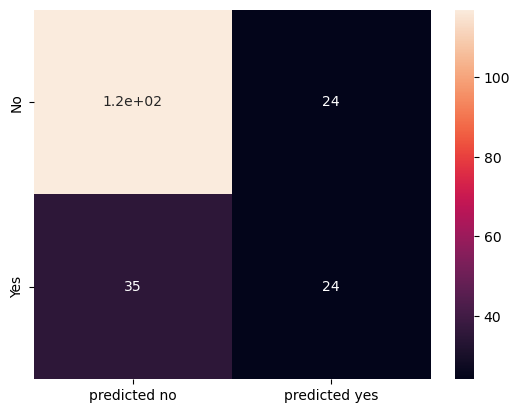

In [128]:
y_predict=model_1.predict(x_test)
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['No','Yes']],
                  columns=[i for i in['predicted no','predicted yes']])
sns.heatmap(df_cm,annot=True)

In [129]:
#now we will do bagging

In [130]:
from sklearn.ensemble import BaggingClassifier

In [166]:
Bmodel=BaggingClassifier(base_estimator=model,n_estimators=50,random_state=1)
Bmodel.fit(x_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=1)

In [167]:
Bmodel.score(x_train,y_train)

1.0

In [168]:
Bmodel.score(x_test,y_test)

0.765

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

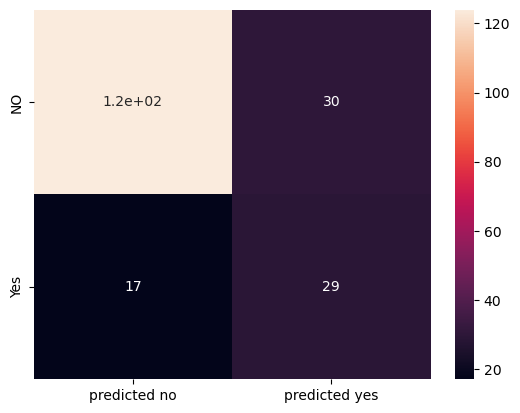

In [169]:
Bmodel_predict=Bmodel.predict(x_test)
cm=metrics.confusion_matrix(Bmodel_predict,y_test,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['NO','Yes']],
                            columns=[i for i in ['predicted no','predicted yes'] ])
sns.heatmap(df_cm,annot=True)

In [170]:
#now we will do ada boosting

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
ada_model=AdaBoostClassifier(n_estimators=10,random_state=1)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10, random_state=1)

In [173]:
ada_model.score(x_train,y_train)

0.77125

In [174]:
ada_model.score(x_test,y_test)

0.735

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

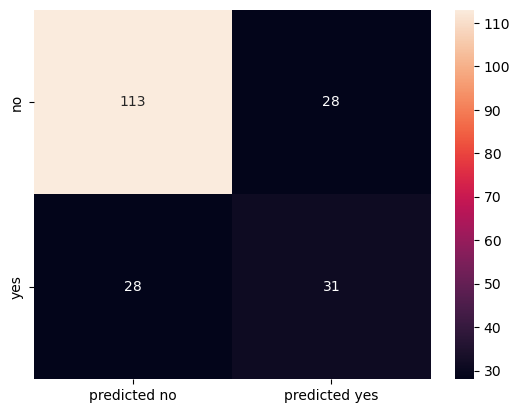

In [180]:
ada_predict=ada_model.predict(x_test)
cm=metrics.confusion_matrix(ada_predict,y_test,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['no','yes']],
                  columns=[i for i in ['predicted no','predicted yes']])
sns.heatmap(df_cm,annot=True,fmt='g')

In [175]:
ada_model=AdaBoostClassifier(base_estimator=model,n_estimators=10,random_state=1)
ada_model.fit(x_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10,
                   random_state=1)

In [176]:
model.score(x_train,y_train)

1.0

In [177]:
model.score(x_test,y_test)

0.69

In [181]:
#this is because it is recommended to use no base model if it is simple then it will figure out things better for you

In [182]:
#now we will do gradient boost

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

In [188]:
g_model=GradientBoostingClassifier(n_estimators=10,random_state=1)
g_model.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=10, random_state=1)

In [185]:
g_model.score(x_train,y_train)

0.725

In [186]:
g_model.score(x_test,y_test)

0.7

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

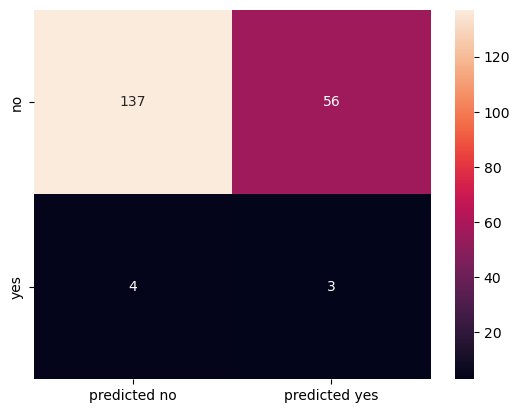

In [189]:
g_predict=g_model.predict(x_test)
cm=metrics.confusion_matrix(g_predict,y_test,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['no','yes']],
                  columns=[i for i in ['predicted no','predicted yes']])
sns.heatmap(df_cm,annot=True,fmt='g')

In [198]:
#now we will doing Random Forest

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
r_model=RandomForestClassifier(max_depth=25,n_estimators=50,random_state=1,max_features=10)
r_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, max_features=10, n_estimators=50,
                       random_state=1)

In [216]:
r_model.score(x_test,y_test)

0.76

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

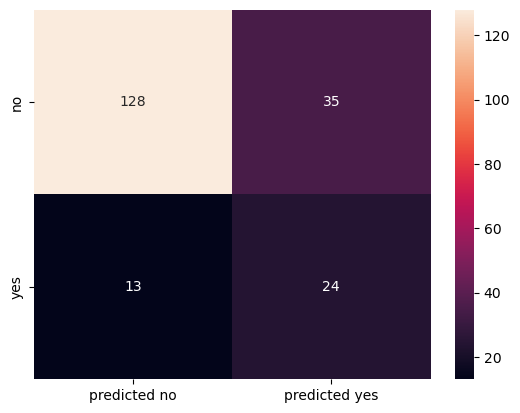

In [217]:
r_predict=r_model.predict(x_test)
cm=metrics.confusion_matrix(r_predict,y_test,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in ['no','yes']],
                  columns=[i for i in ['predicted no','predicted yes']])
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
#it is suitable for complex models in starting